In [9]:
import pandas as pd
from helper_functions import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
occ_list = import_occupations('data/occupations_updated.csv')
models = ['roberta-base', 'roberta-large', 'bert-base-cased', 'bert-large-cased']

### Categorical Data Evaluation
1. Count four classifications for each occupation -> confusion matrix
2. calculate measures per occupation
3. calculate measures in total

Confusion matrix 2x2:
|      | he | she |
|------|------|--------|
|he  |      |        |
|she |      |        |

Confusion matrix 3x3:

|      | he | she | they |
|------|------|--------|-------|
|he  |      |        |       |
|she|      |        |       |
|they |      |        |       |

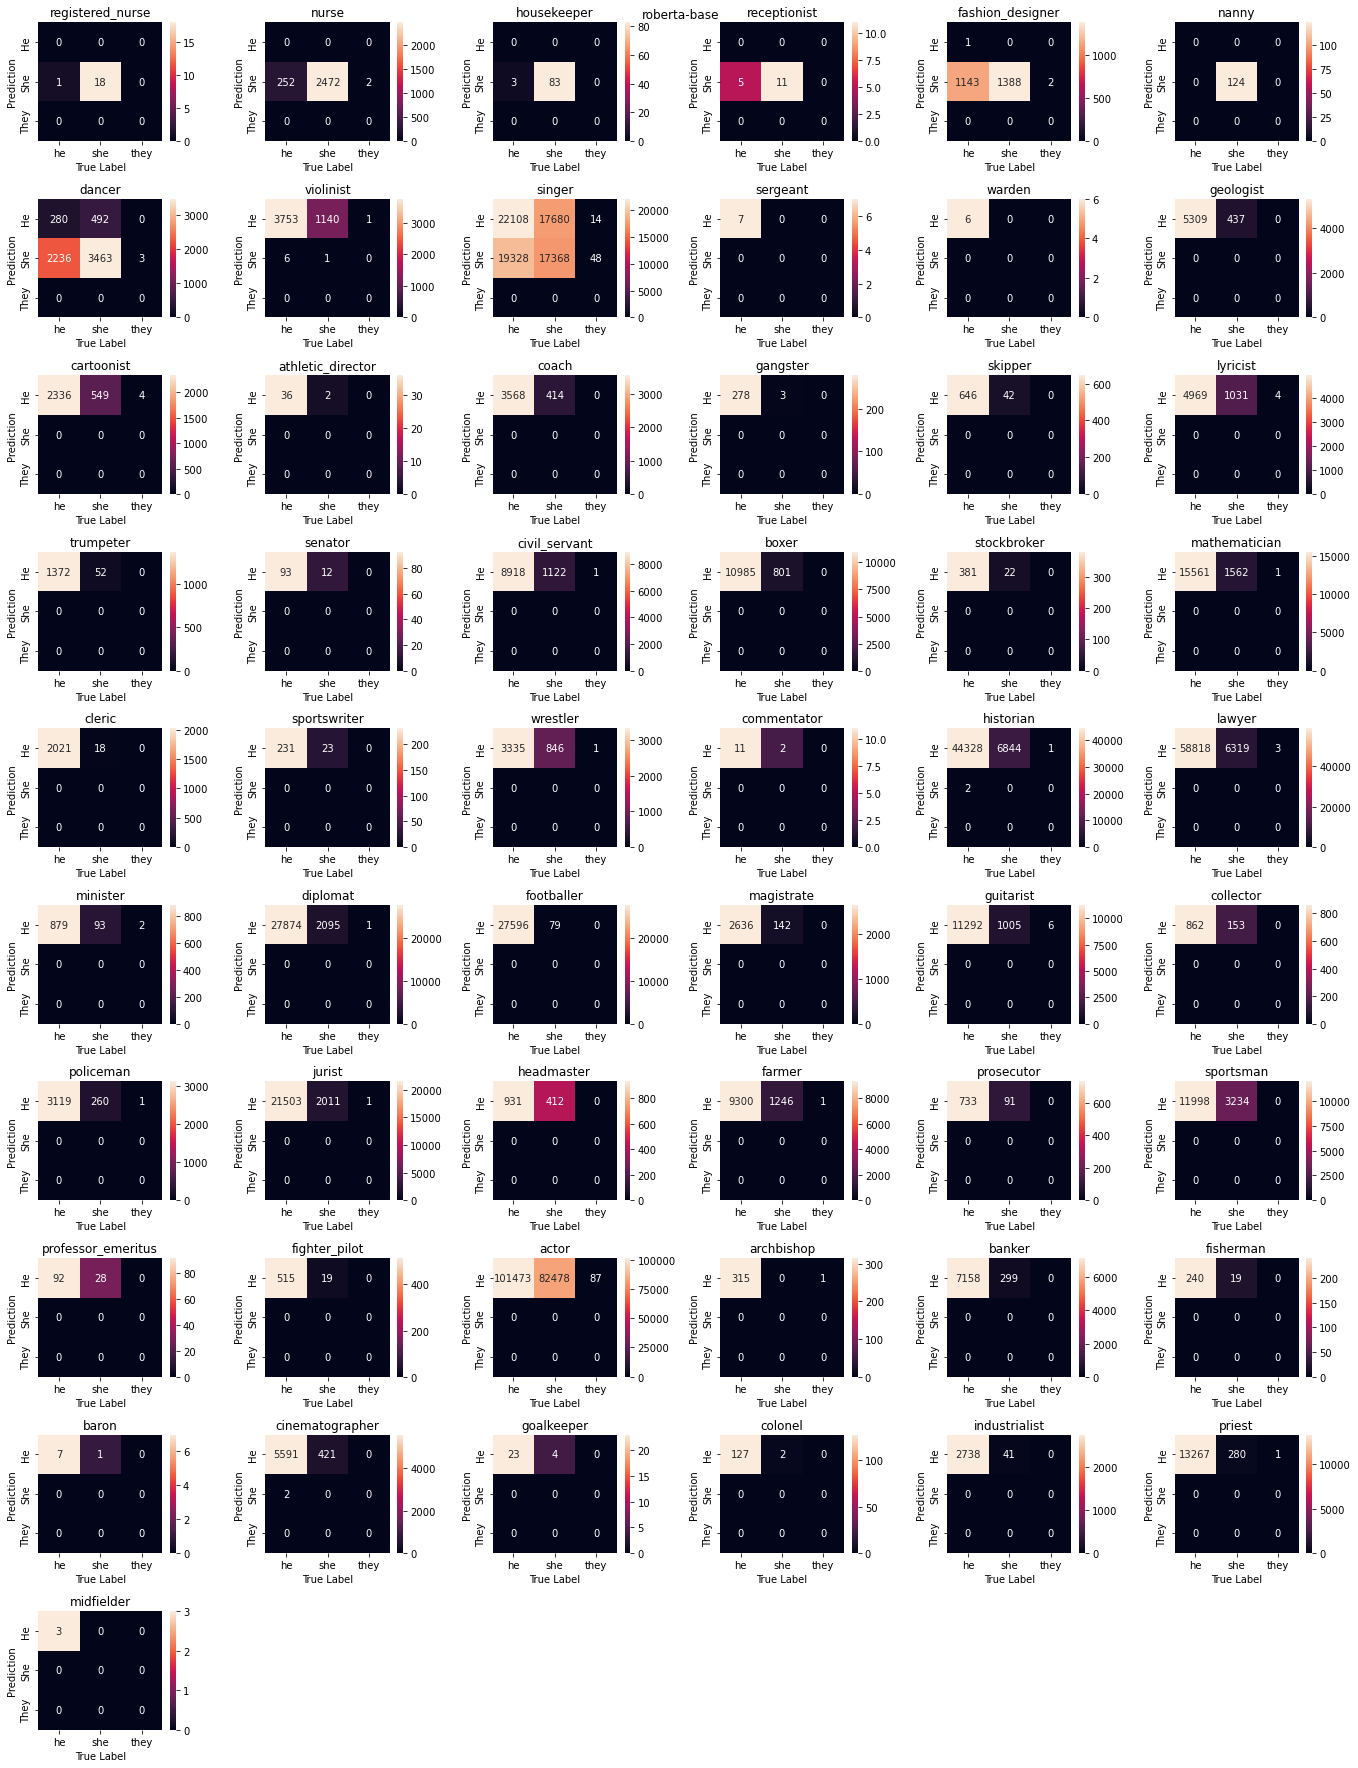

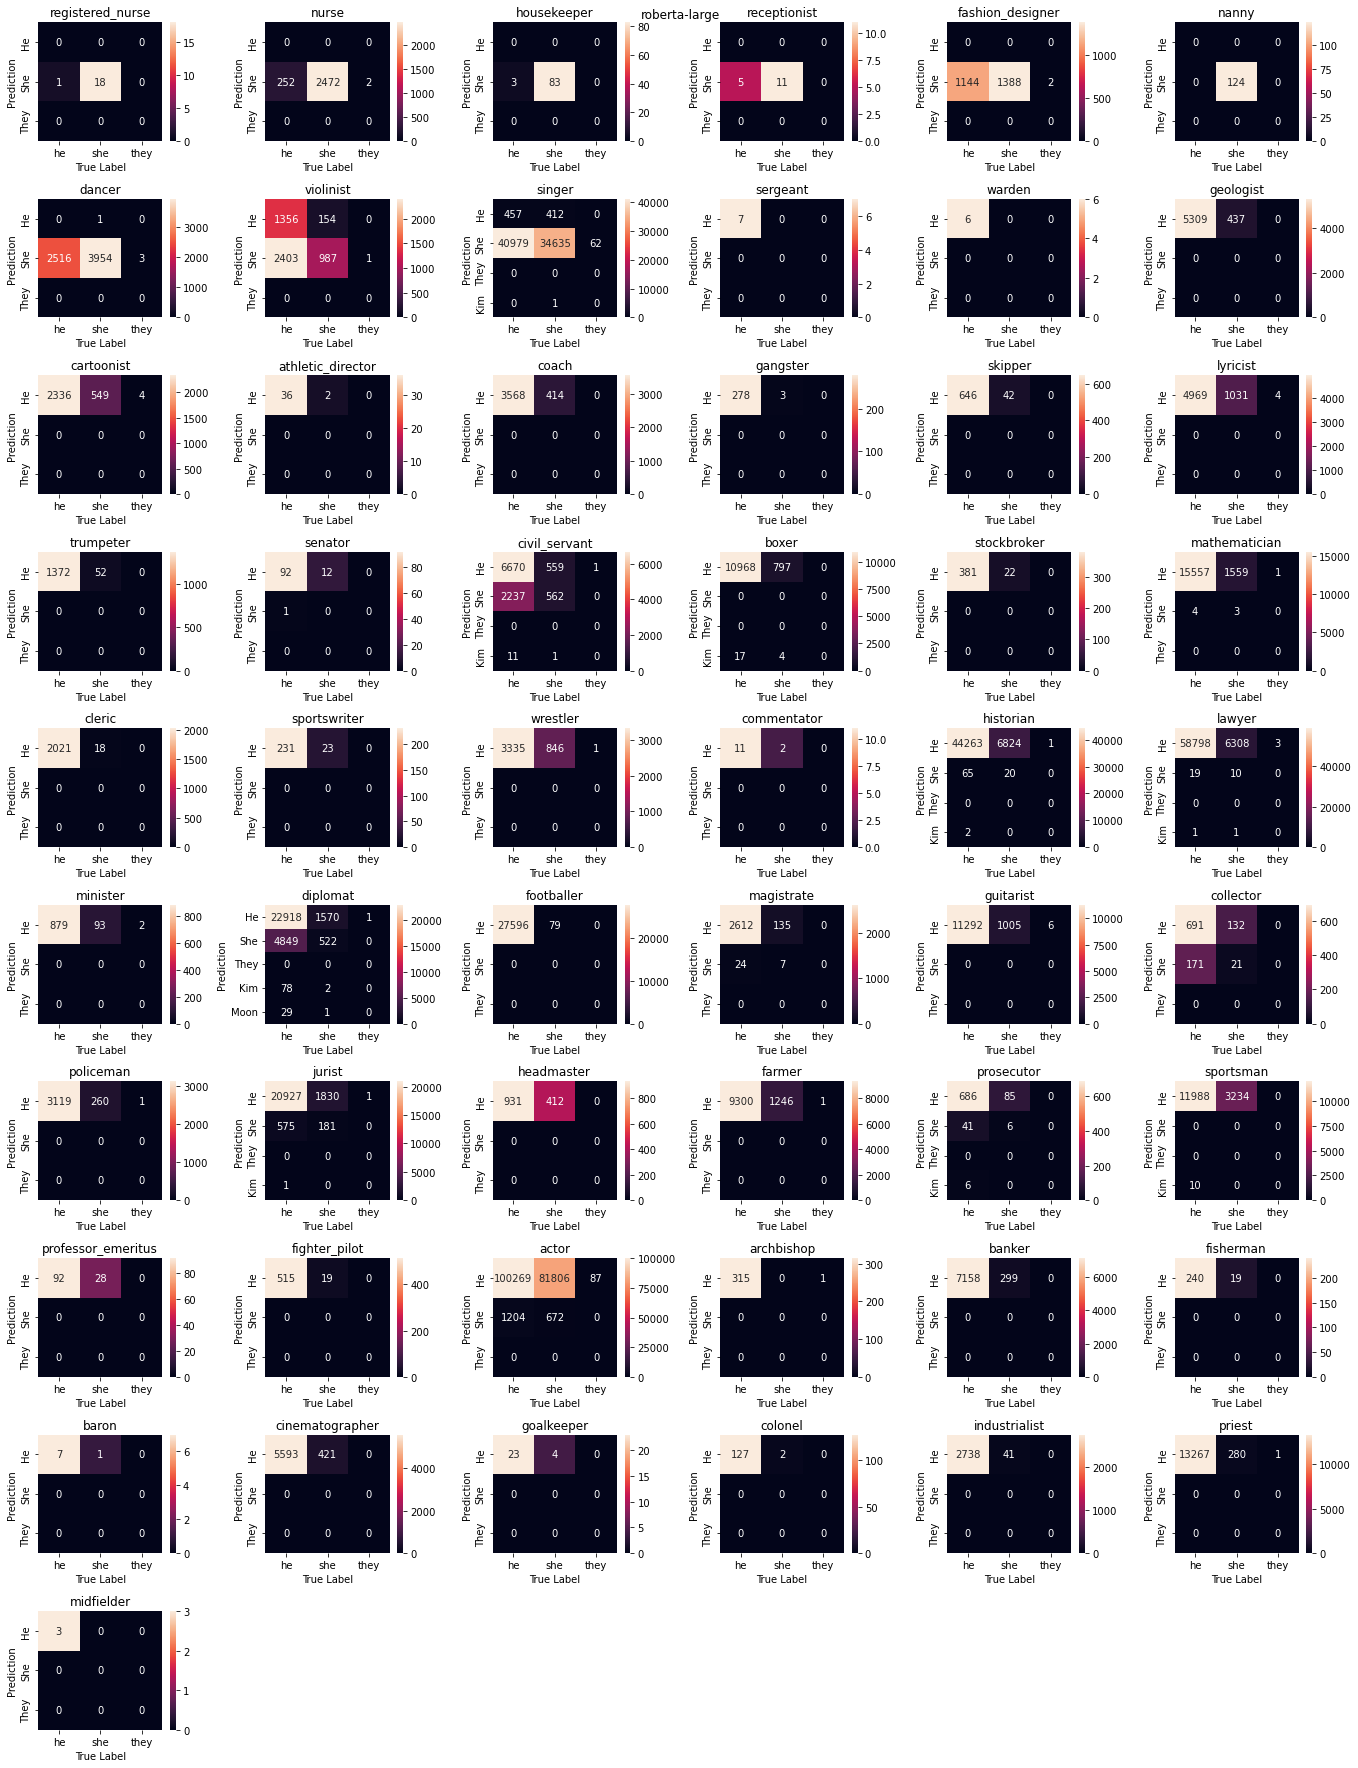

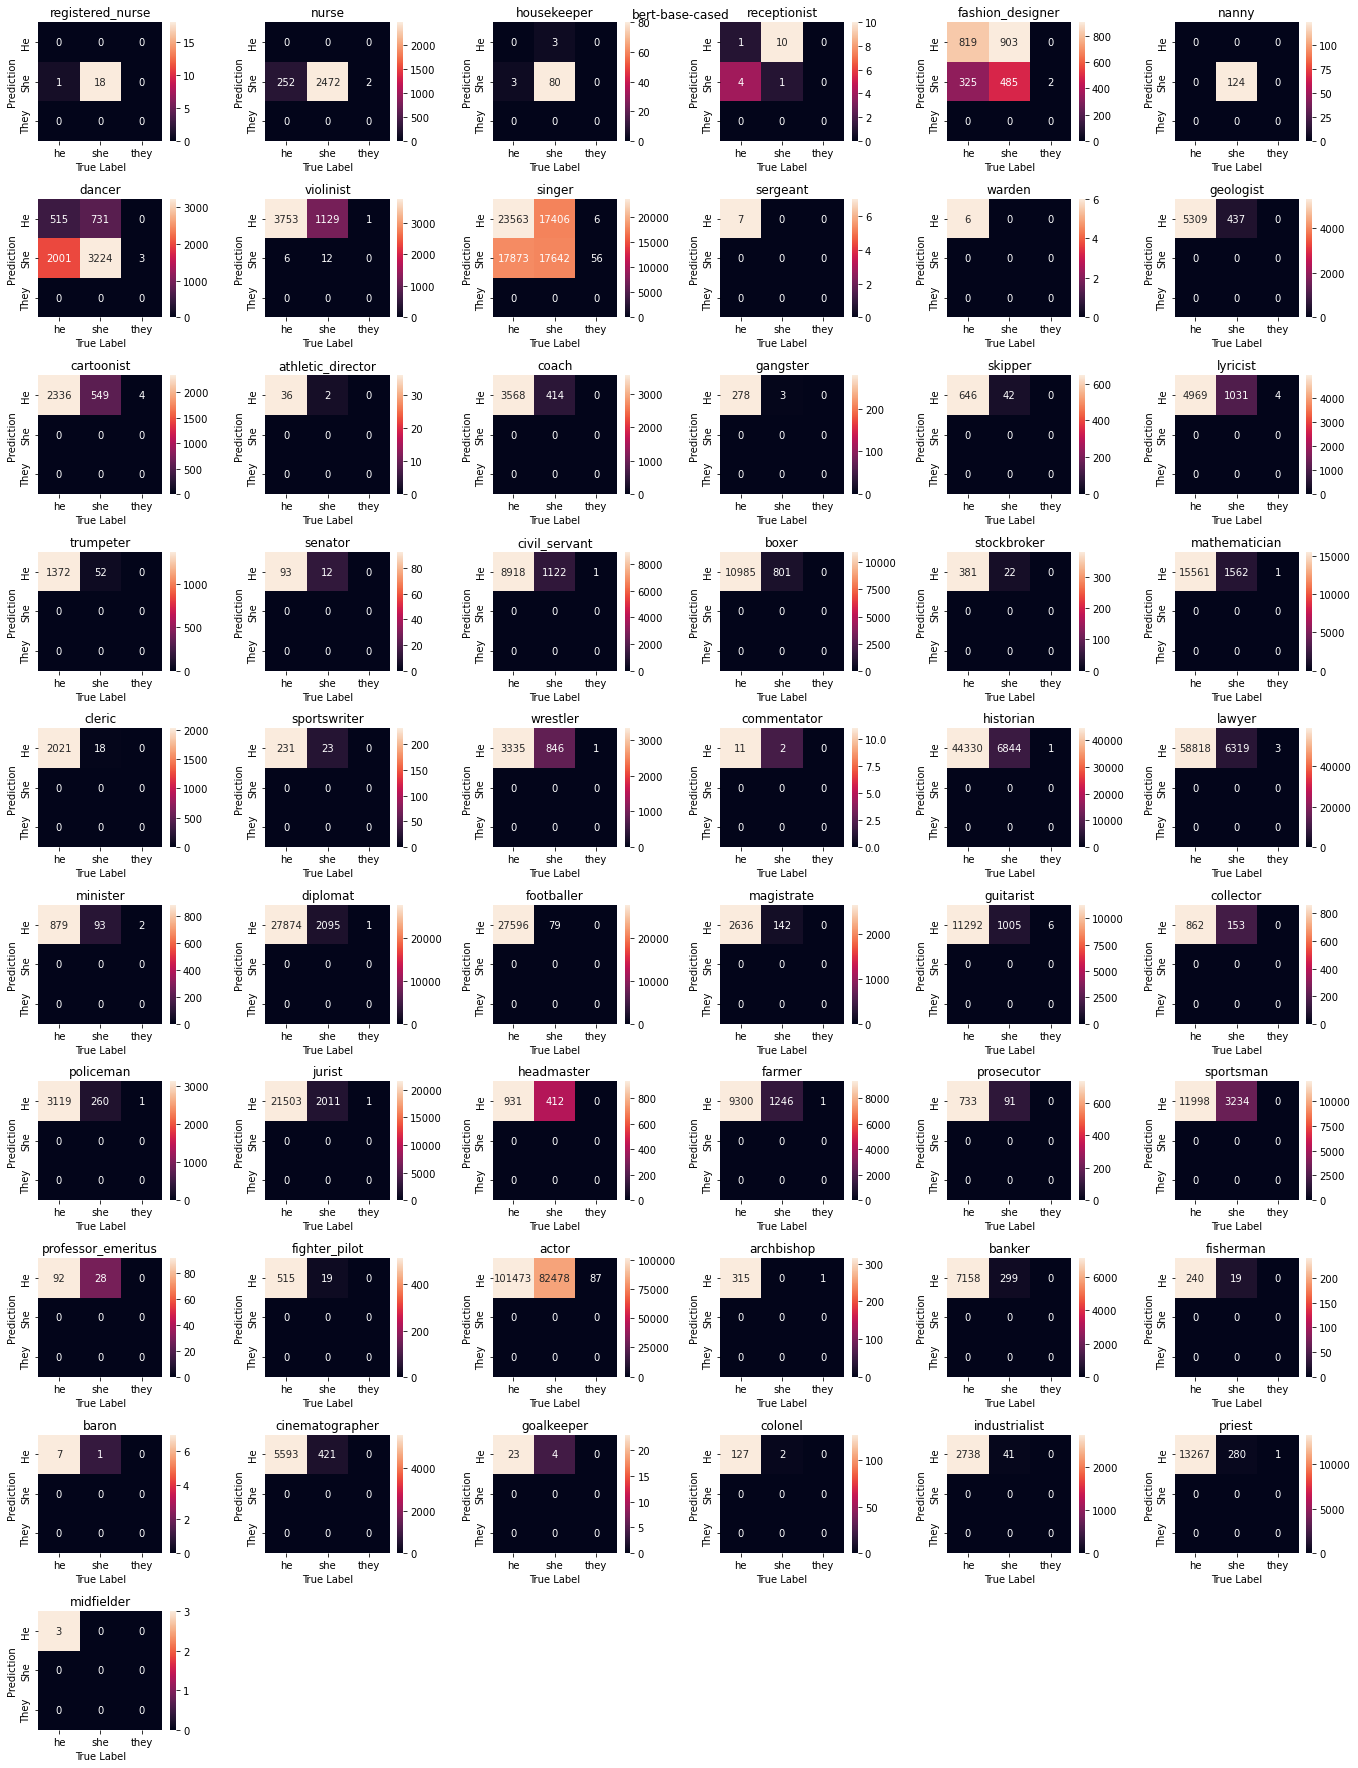

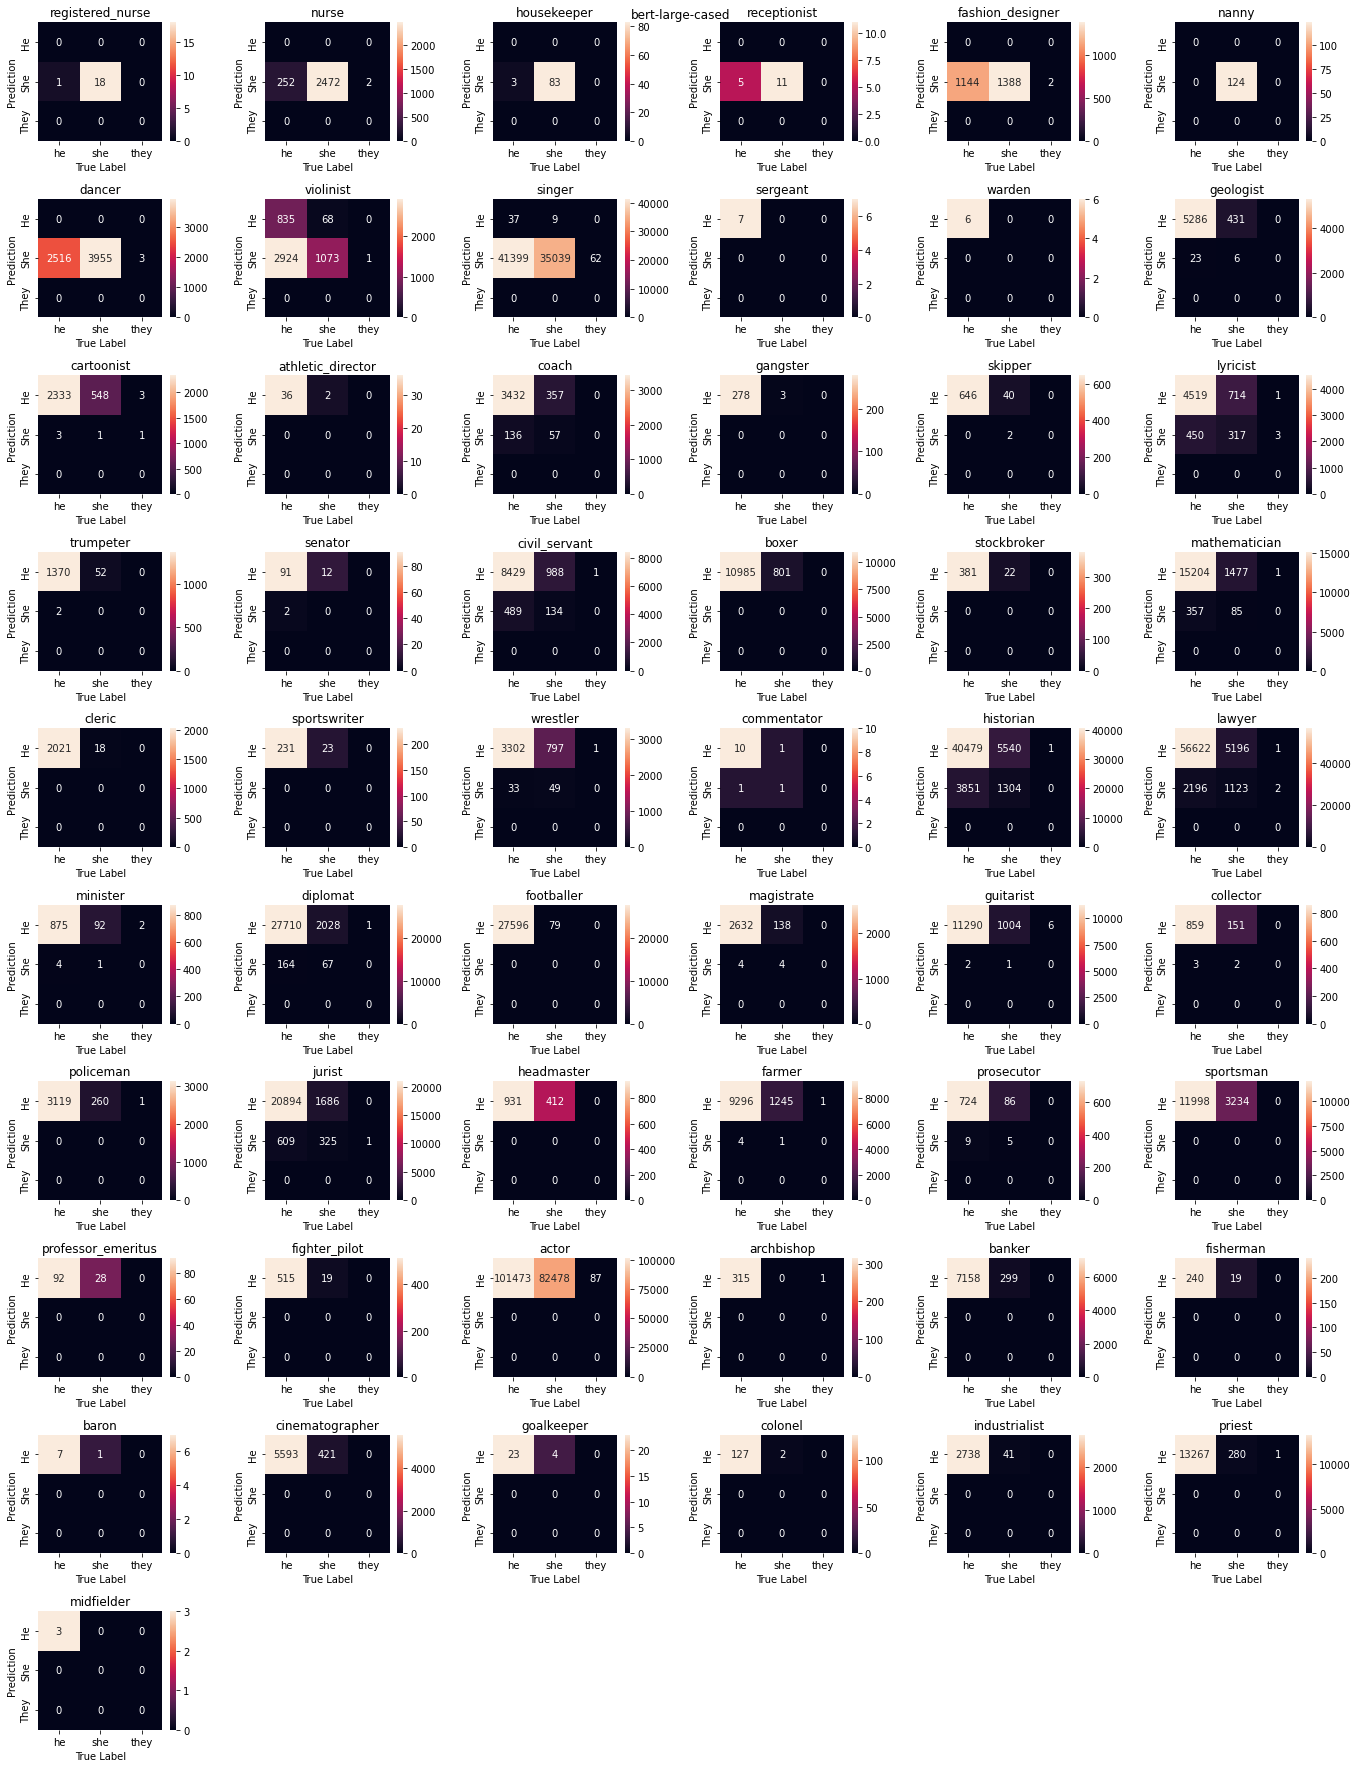

In [11]:
for model in models:
    matrices = get_matrix(model, occ_list)
    fig = plt.figure(figsize=(19,25))
    fig.suptitle(model)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i, occ in enumerate(occ_list):
        ax = fig.add_subplot(10, 6, i+1)
        ax.title.set_text(occ[0])
        graph = sns.heatmap(matrices[occ[0]].astype('int64'), ax=ax, annot=True, fmt='d')
        graph.set_xlabel("True Label")
        graph.set_ylabel("Prediction")
    fig.tight_layout()
    plt.savefig('figures/' + model + 'confusion_matrices_3x3.pdf')
    plt.show()

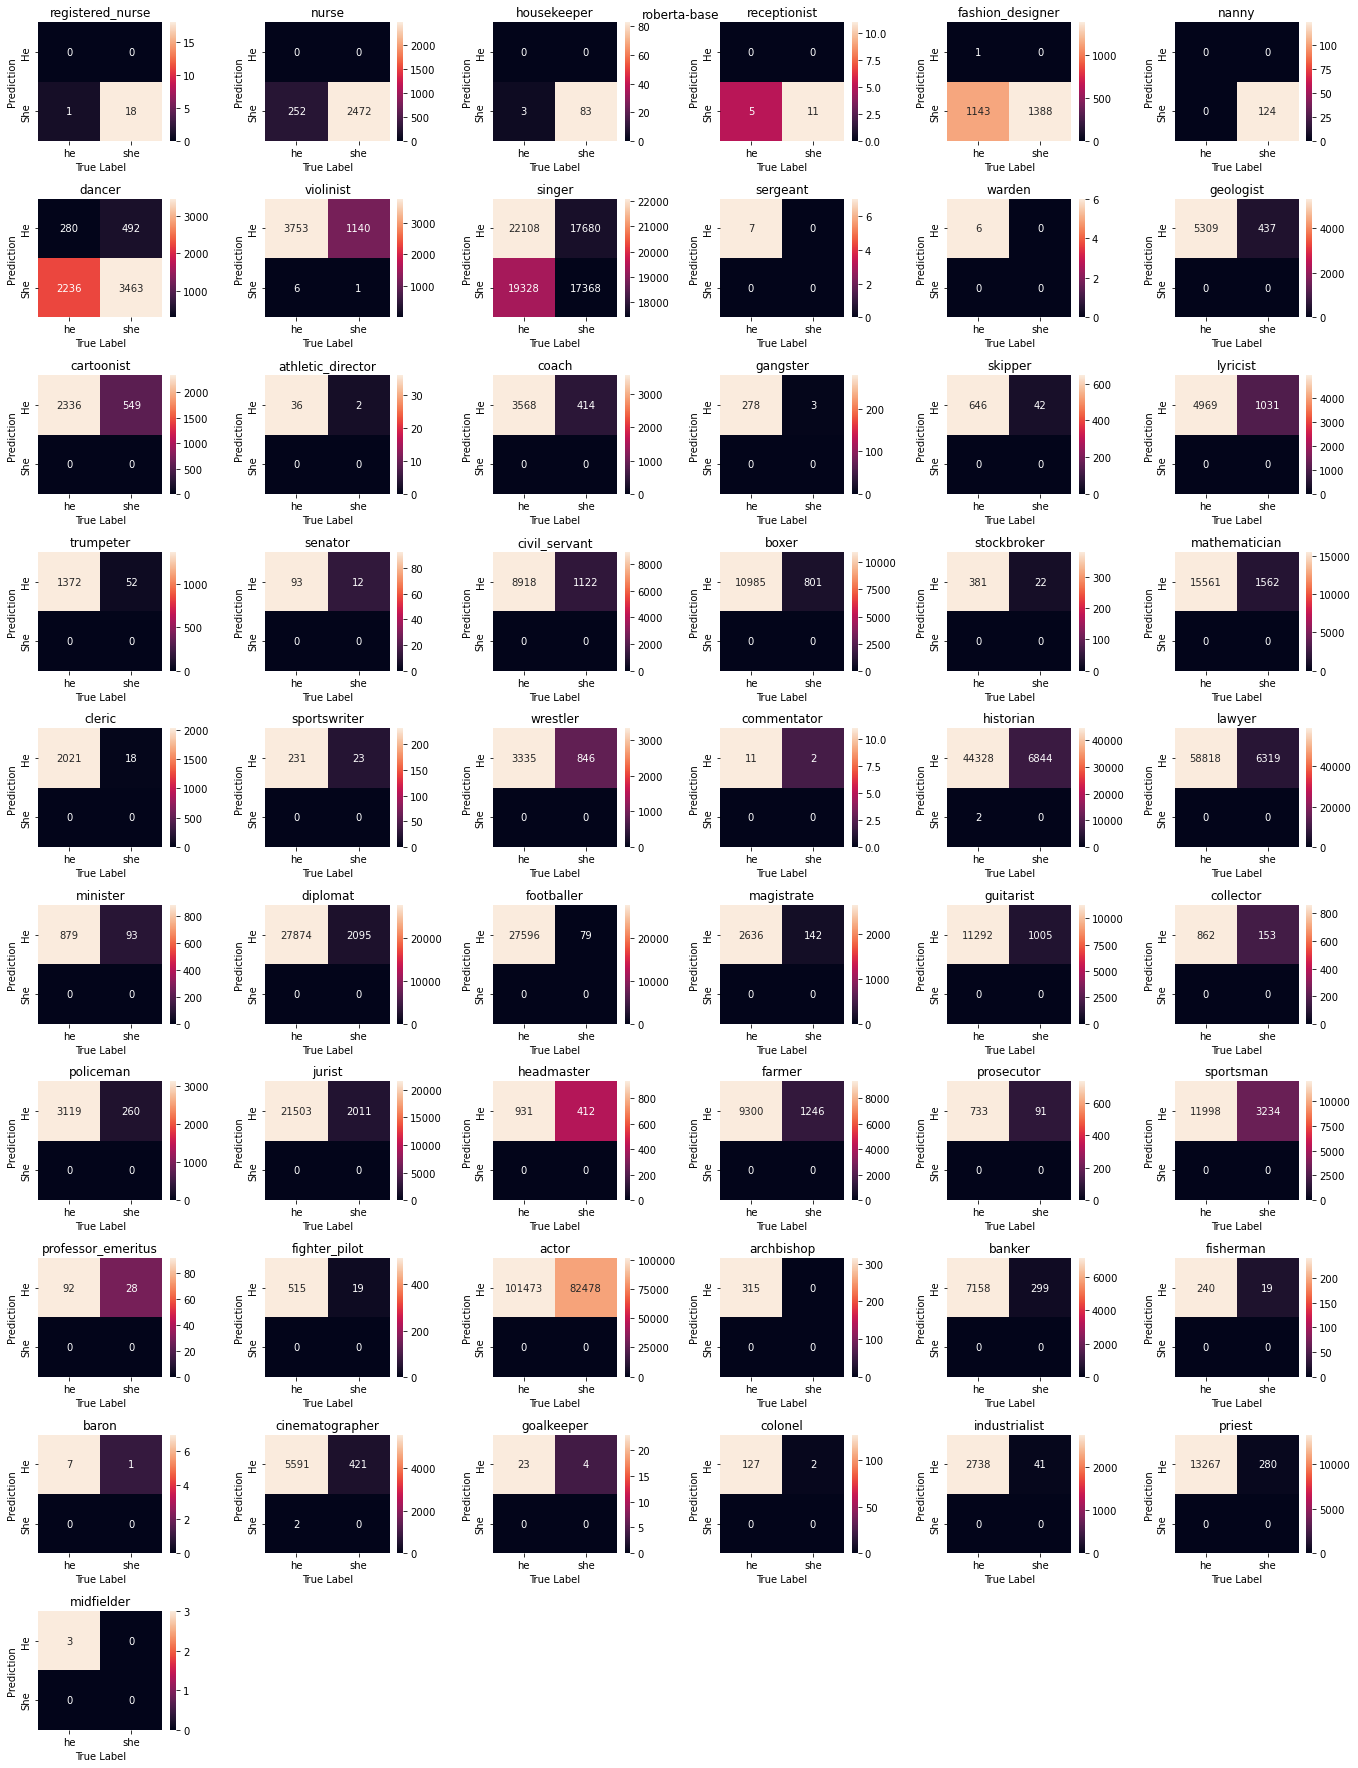

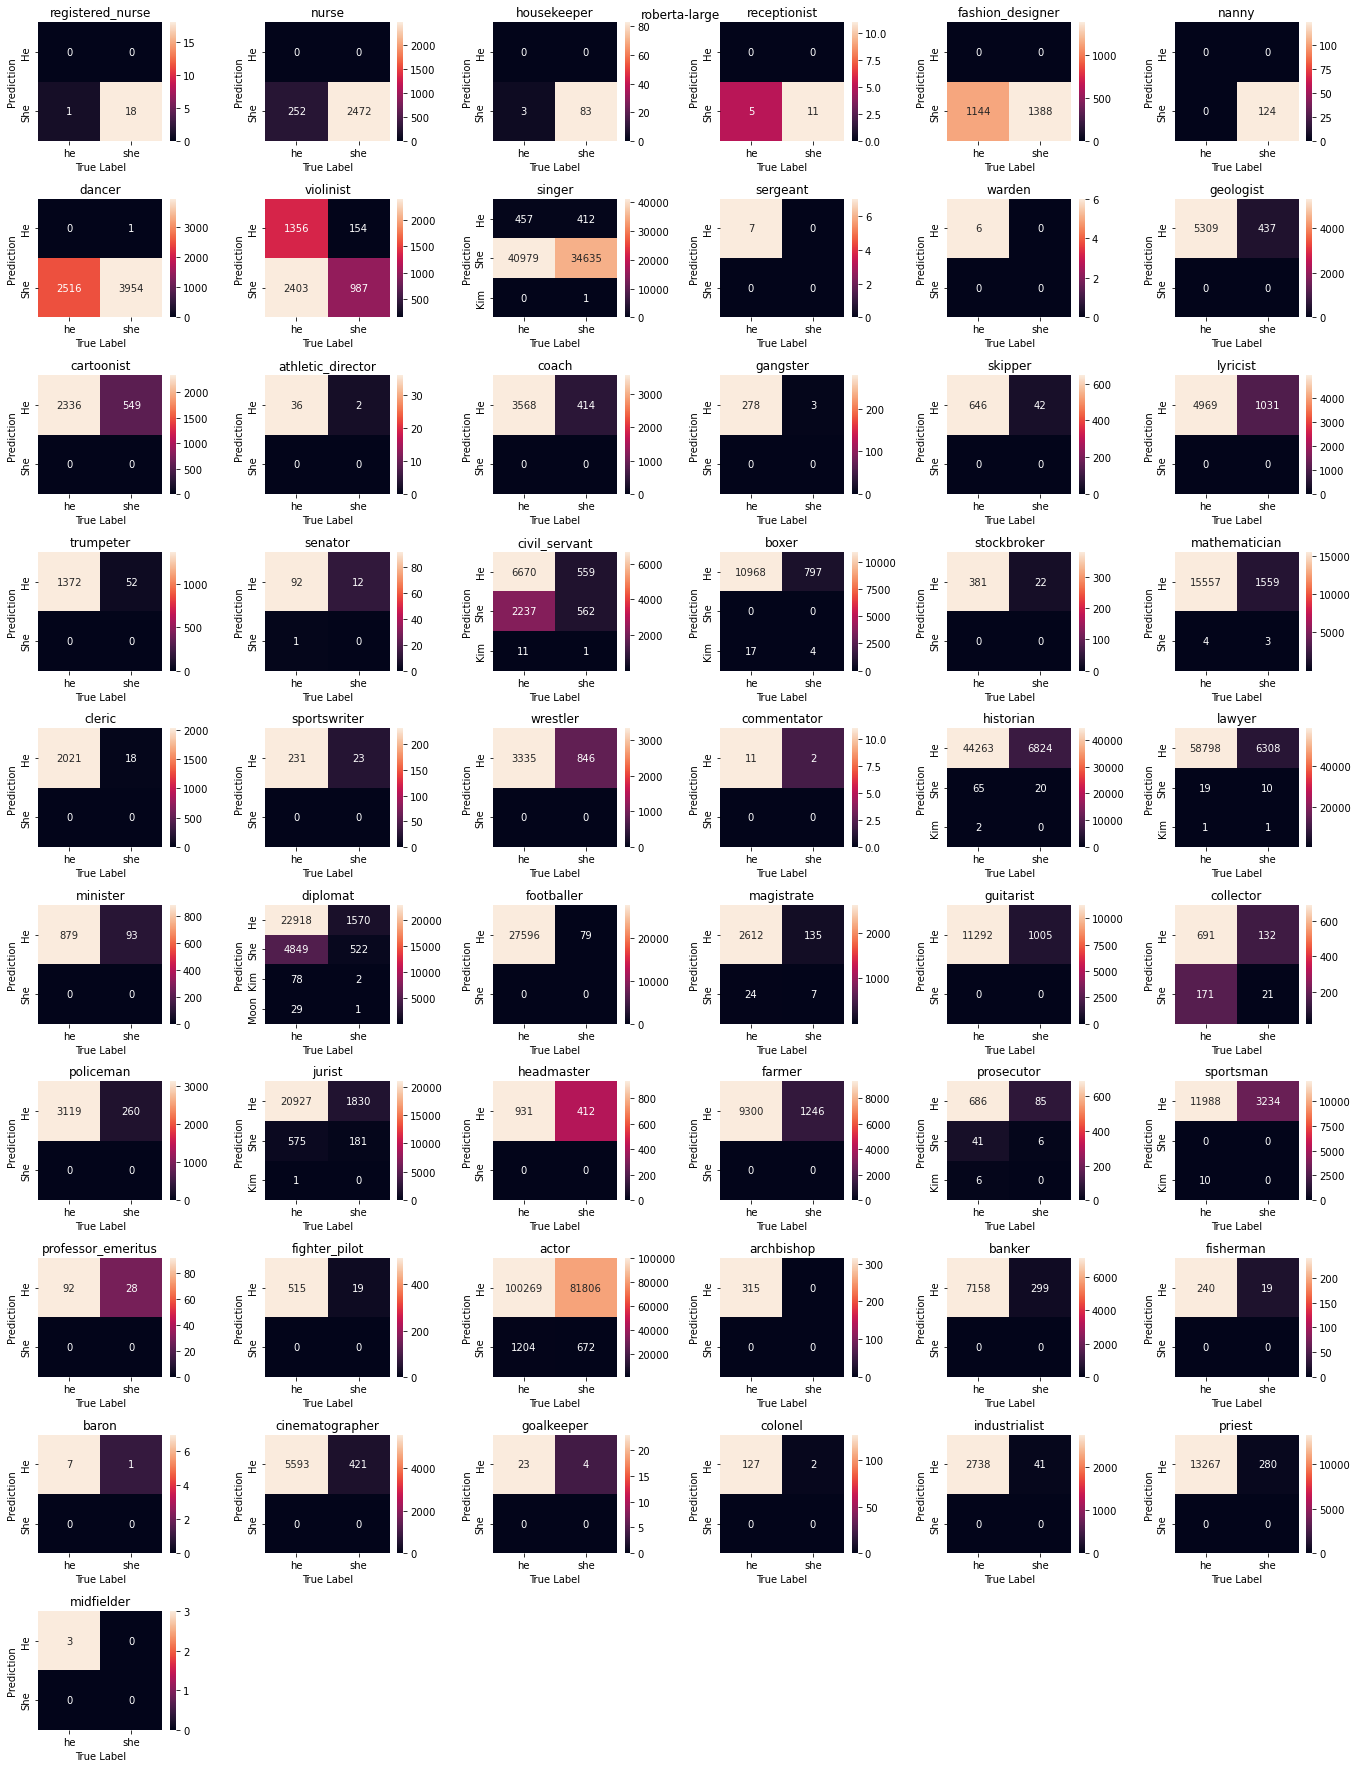

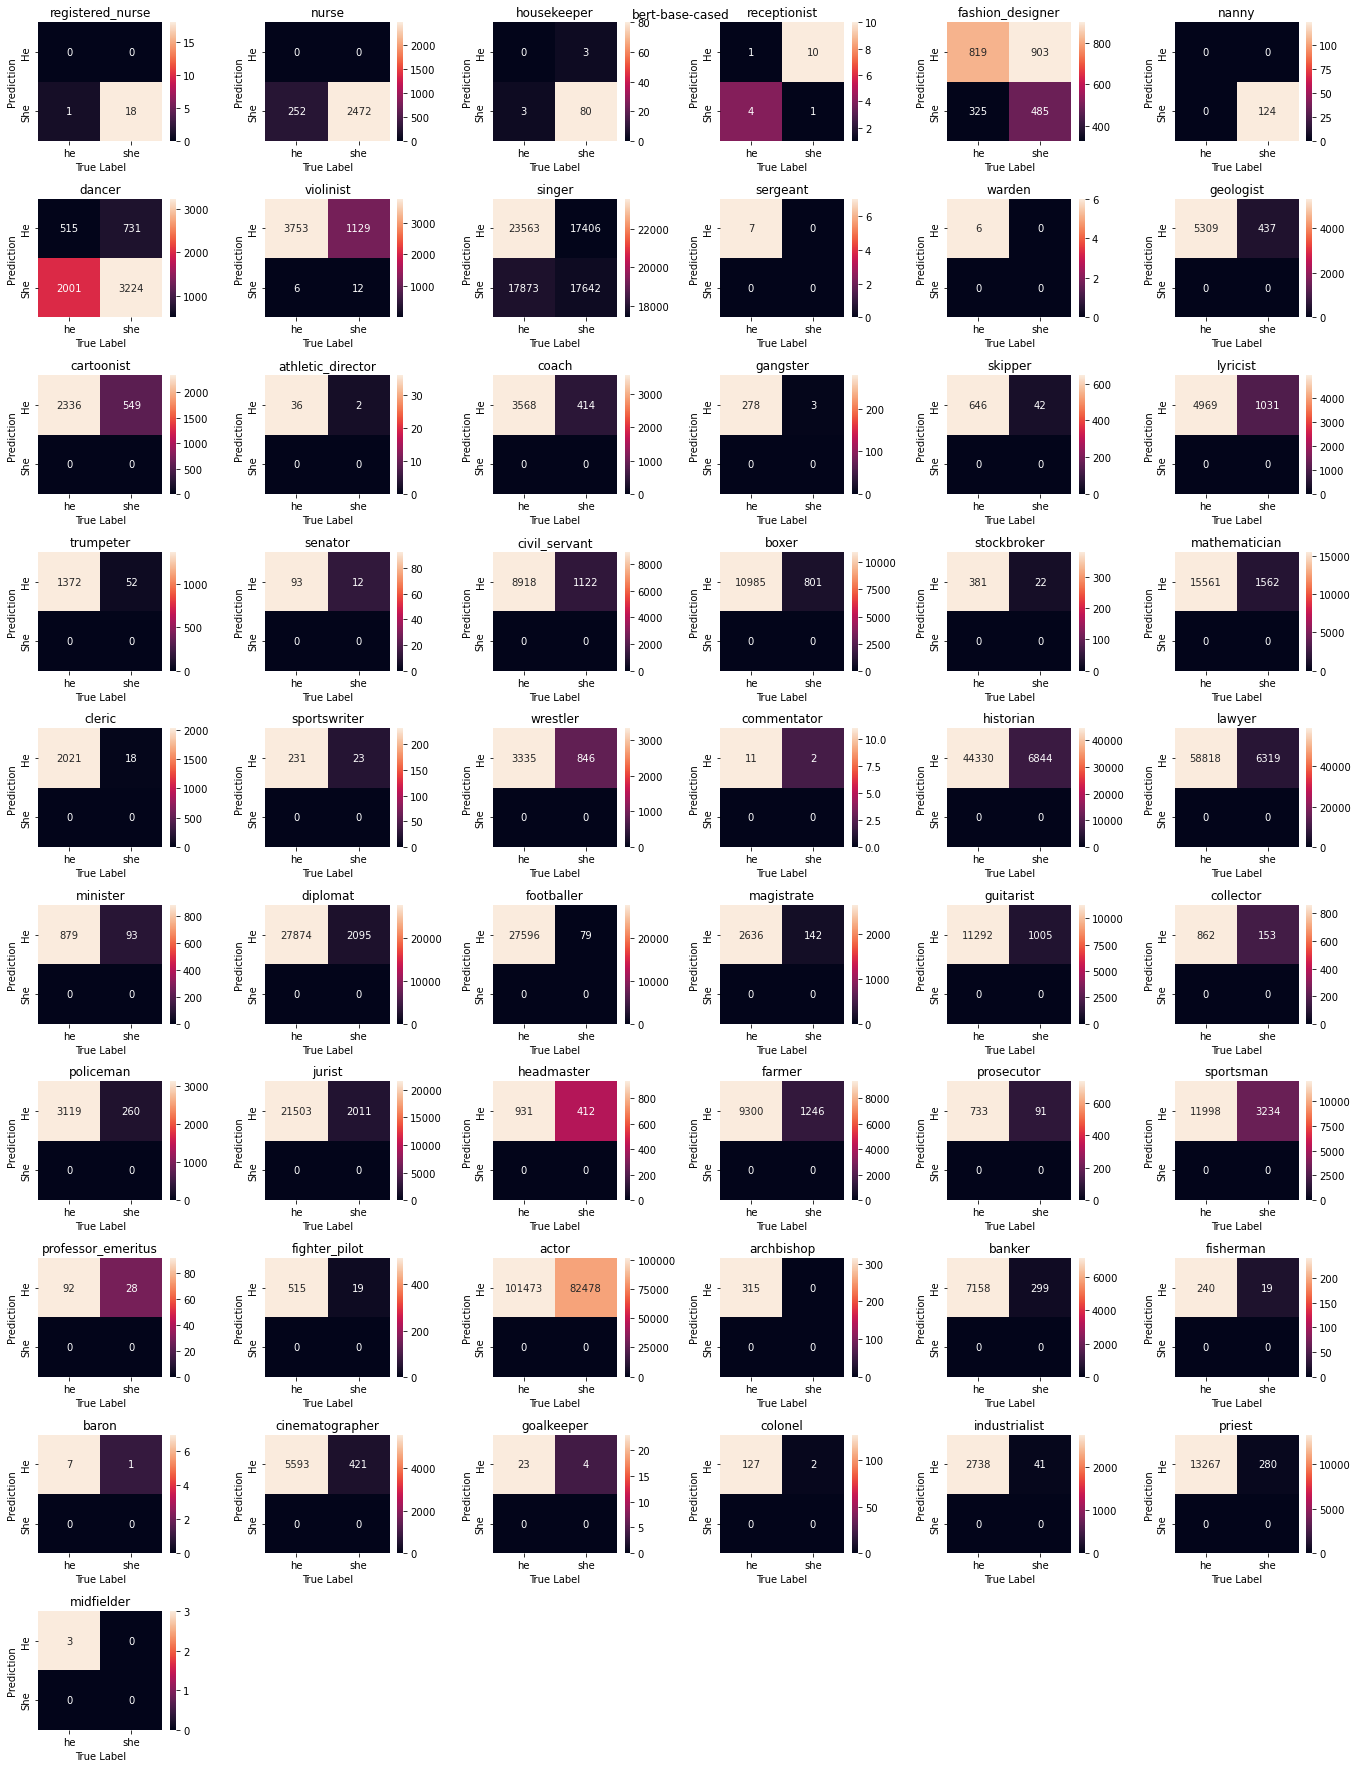

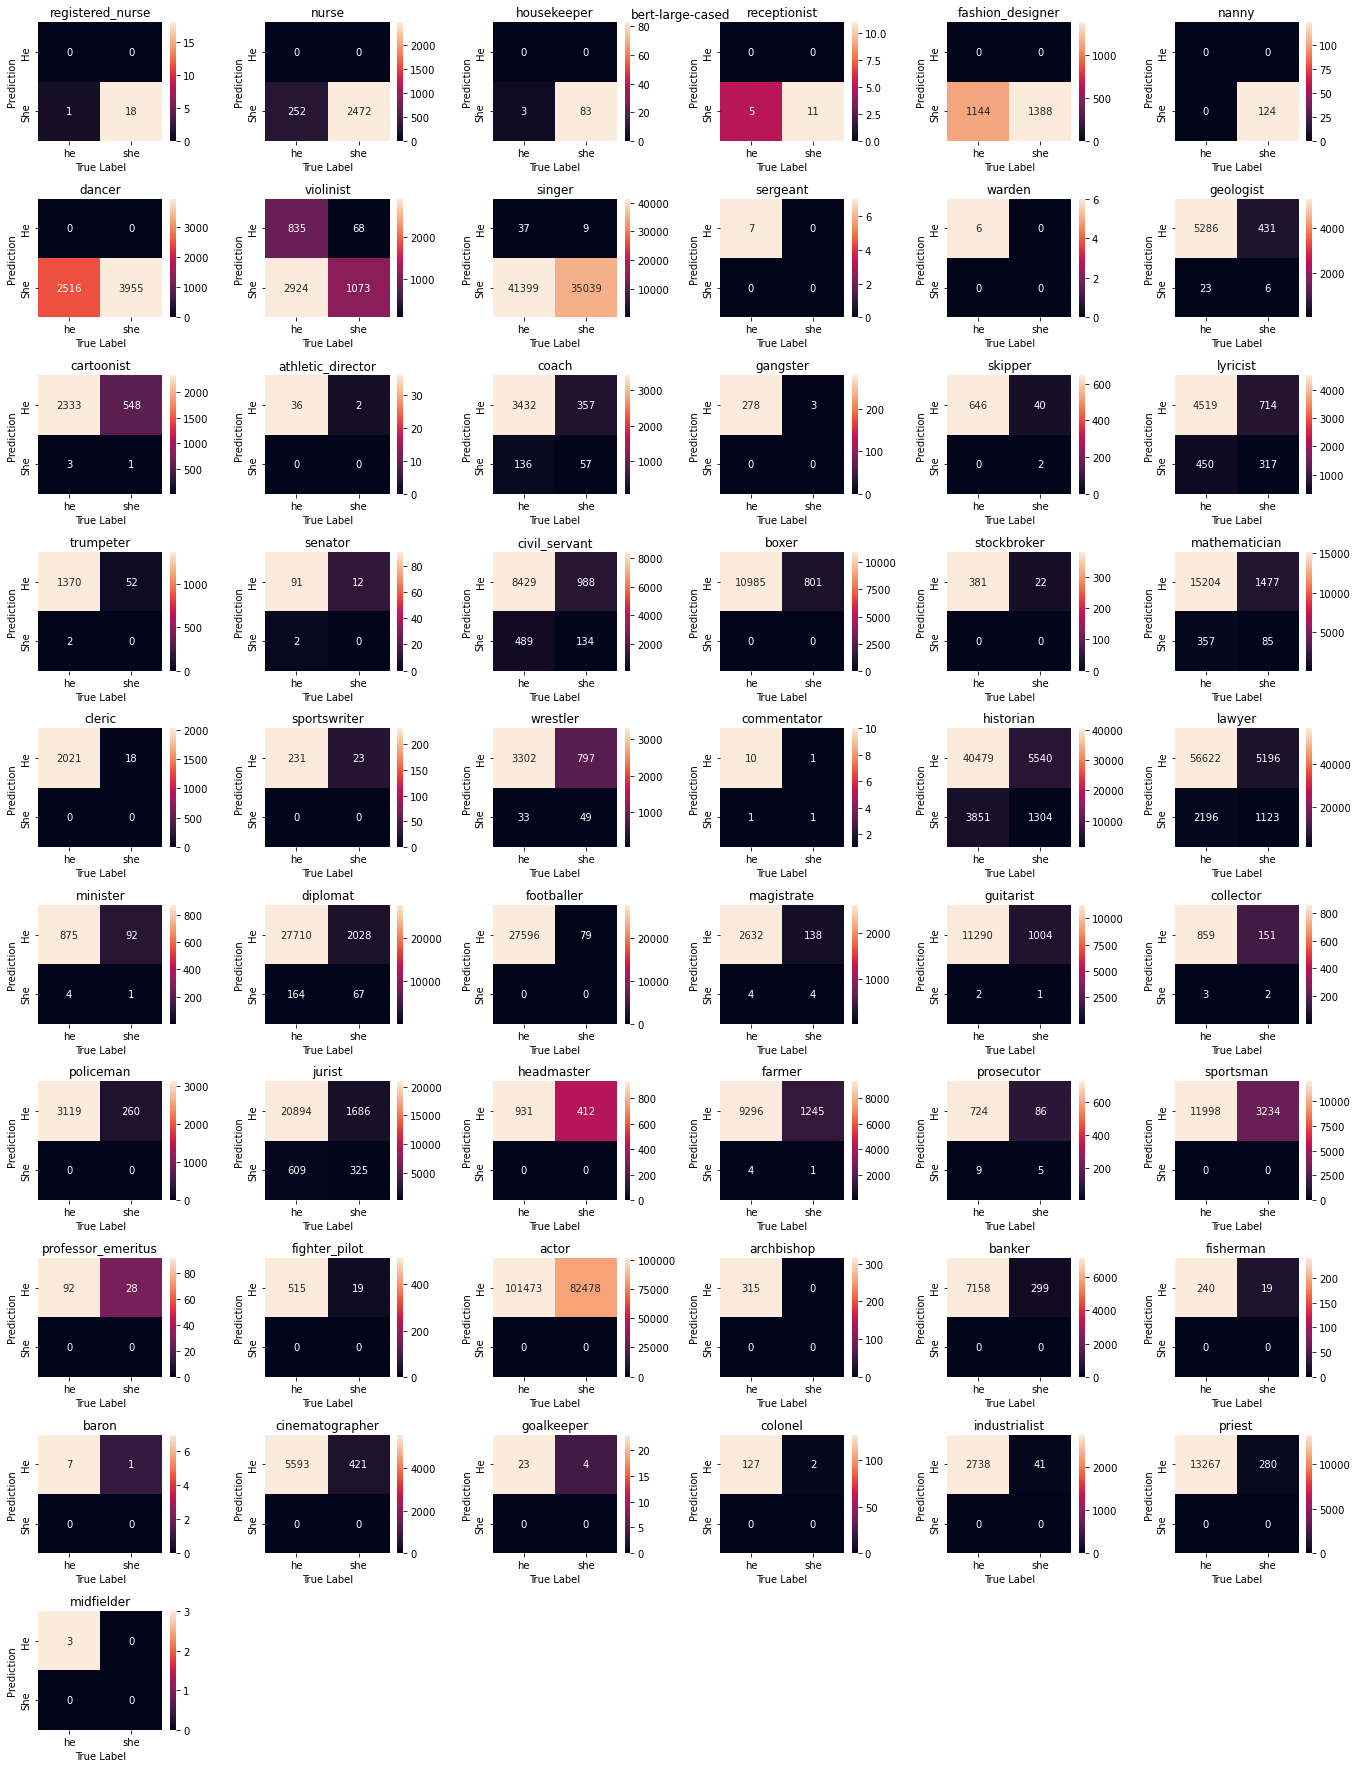

In [12]:
for model in models:
    matrices = get_matrix(model, occ_list)
    fig = plt.figure(figsize=(19, 25))
    fig.suptitle(model)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for i, occ in enumerate(occ_list):
        ax = fig.add_subplot(10, 6, i+1)
        ax.title.set_text(occ[0])
        matrix = matrices[occ[0]]
        matrix = matrix.drop('they', axis=1)
        matrix = matrix.drop('They', axis=0)
        graph = sns.heatmap(matrix.astype('int64'), ax=ax, annot=True, fmt='d')
        graph.set_xlabel("True Label")
        graph.set_ylabel("Prediction")
    fig.tight_layout()
    plt.savefig('figures/' + model + 'confusion_matrices_2x2.pdf')
    plt.show()